# Exploration of the .skeleton files provided in the NTU-RGB-D dataset

The aim of this notebook is to extract the 3D coordinates of the .skeleton files and play them back. The sample names follow the notation SsssCcccPpppRrrrAaaa with :

S : setup number 

C : camera id

P : performer id

R : replication number

A : action label

In [4]:

import numpy as np
import os
import random
import sys
sys.path.append('.')
sys.path.append('..')
from matplotlib import animation
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# from play_skeleton import *
# from src.utils.joints import *
# from src.data.read_NTU_RGB_D_skeleton import *

# Global variables (change depending on your setup)
project_dir = os.getcwd() + '/../'
raw_data = project_dir + "data/raw/"
skeleton_folder = raw_data + "nturgb+d_skeletons/"
skeleton_folder = './'


#### 아래는, .npy -> .skeleton로 변경하는 코드 (실행시, 파일명 및 경로 수정필요)

In [ ]:
arr = np.load("./2023-02-20 145917.npy", allow_pickle=True)
listOfData = arr.tolist()
print(arr)
dictOfTypeIdx = {0:1, 1:2, 2:4, 3:27, 4:6,
                 5:7, 6:8, 7:9, 8:13, 9:14, 10:15,
                 11:16, 12:19, 13:20, 14:21, 15:22,
                 16:23, 17:24, 18:25, 19:26, 20:3,
                 21:10, 22:11, 23:17, 24:18}
listOfResult = [0 for i in range(25)]

f = open("./S001C001P001R001A001.skeleton", 'w')
f.write(str(len(listOfData)) + "\n")
for i in range(len(listOfData)):
    idx = 0
    # frame: 0부터 시작 ++
    # 사람수: 무조건 1로 둠
    for j in range(1, len(listOfData[i])):
        if j in dictOfTypeIdx.values():
            listOfResult.insert(idx, arr[i][dictOfTypeIdx[idx]])
            idx = idx + 1
                    
    for j in range(25):
        temp = str(listOfResult[j])[1:-1]
        temp = temp.replace(',','')
        f.write(temp + "\n")
    listOfResult = [0 for i in range(25)]
    f.write("\n")
    
f.close()



# 1: 골반, 2: 배꼽, 3: 목, 4: 머리, 5: 왼쪽 어깨
# 6: 왼쪽 팔꿈치, 7: 왼쪽 손목, 8: 왼쪽 손, 9: 오른쪽 어깨, 10: 오른쪽 팔꿈치
# 11: 오른쪽 손목, 12: 오른쪽 손, 13: 왼쪽 엉덩이, 14: 왼쪽 무릎, 15: 왼쪽 발목
# 16: 왼쪽 발, 17: 오른쪽  엉덩이, 18: 오른쪽 무릎, 19: 오른쪽 발목, 20: 오른쪽 발
# 21: 가슴, 22: 왼쪽 손가락, 23: 왼쪽 엄지, 24: 오른쪽 손가락, 25: 오른쪽 엄지


#### 아래는 .skeleton으로 변경한 코드를 skeleton shape를 변경하는 코드 (실행시, 파일명 및 경로 수정필요)

## 1. Choose a random sample

In [23]:
# sample_name = os.path.splitext(random.choice(os.listdir(skeleton_folder)))[0]
# sample_name= "S001C002P001R001A011"
# sample_name = "S002C002P007R002A017"
sample_name = "S001C001P001R001A001"
print("Chosen sample name : " + str(sample_name))

Chosen sample name : S001C001P001R001A001


In [90]:
def read_skeleton(file):
    with open(file, 'r') as f:
        skeleton_sequence = {'numFrame': int(f.readline()), 'frameInfo': []}
        
        for t in range(skeleton_sequence['numFrame']):
            # frame_info = {'bodyInfo': []}
            frame_info = {'numBody': 1, 'bodyInfo': []}
            # print(frame_info['numBody'])
            for m in range(frame_info['numBody']):
            #     body_info_key = [
            #         'bodyID', 'clipedEdges', 'handLeftConfidence',
            #         'handLeftState', 'handRightConfidence', 'handRightState',
            #         'isResticted', 'leanX', 'leanY', 'trackingState'
            #     ]
            #     body_info = {
            #         k: float(v)
            #         for k, v in zip(body_info_key, f.readline().split())
            #     }
            #     # print(body_info)
            #     body_info['numJoint'] = int(f.readline())               # 25
            #     # print(body_info['numJoint'])
            #     body_info['jointInfo'] = []
                f.readline()
                body_info = {'jointInfo': []}
                for v in range(25):
                    joint_info_key = [
                        'x', 'y', 'z'
                    ]
                    joint_info = {
                        k: float(v)
                        for k, v in zip(joint_info_key, f.readline().split())
                    }
                    body_info['jointInfo'].append(joint_info)
                    # print(body_info['jointInfo'])
                frame_info['bodyInfo'].append(body_info)
                # print(body_info)
                # print(frame_info['bodyInfo'])
            skeleton_sequence['frameInfo'].append(frame_info)
    # print(skeleton_sequence)
    return skeleton_sequence


def read_xyz(file, max_body=2, num_joint=25):
    seq_info = read_skeleton(file)
    # print(seq_info)
    data = np.zeros((3, seq_info['numFrame'], num_joint, max_body), dtype=np.float32)
    # print(data)
    # print(seq_info['frameInfo'])
    for n, f in enumerate(seq_info['frameInfo']):
        for m, b in enumerate(f['bodyInfo']):
            for j, v in enumerate(b['jointInfo']):
                if m < max_body and j < num_joint:
                    # print(v['x'], v['y'], v['z'])
                    data[:, n, j, m] = [v['x'], v['y'], v['z']]
                else:
                    pass
    data = np.around(data, decimals=3)
    # print(data)

    return data

## 2. Extract skeleton coordinates

read_xyz(...) returns a (3, max_frame, num_joint=25, 2) numpy array

read_color_xy(...) returns (2, max_frame, num_joint=25, 2) numpy array

In [93]:
skeleton = read_xyz(skeleton_folder + sample_name + ".skeleton") # shape (3, 103, 25, 2)
print(skeleton.shape)
print(skeleton[0,0,0,:])
print("===== 3D skeleton =====")
print(skeleton[0, 0, :, 0], "\n")
print(skeleton[0, :, 0, 0], "\n")
print(skeleton[:, 0, 0, 0], "\n")
print(skeleton[:, 0, :, 0], "\n")

print(skeleton.transpose(3, 2, 0, 1)[0].shape)

# has_2_subjects = np.any(skeleton[:, :, :, 1])
# print("Number of subjects : " + str(int(has_2_subjects) * 2))

(3, 32, 25, 2)
[226.326   0.   ]
===== 3D skeleton =====
[ 226.326   74.221 -265.905 -349.162 -180.825   13.246  176.627  272.22
 -292.795 -172.986 -108.398   -5.148  260.278  687.875 1027.425 1174.338
  195.709  417.28   845.068  846.672  -58.021  392.033  332.276   -4.528
   20.466] 

[ 226.326  214.106  162.381    0.       0.       0.       0.       0.
    0.       0.       0.       0.       0.       0.       0.       0.
    0.       0.       0.    -252.394 -268.838 -281.649 -313.939 -359.743
 -370.506 -374.135 -376.678 -380.318 -383.404 -380.371 -367.619 -373.052] 

[ 226.326  181.815 2388.142] 

[[ 226.326   74.221 -265.905 -349.162 -180.825   13.246  176.627  272.22
  -292.795 -172.986 -108.398   -5.148  260.278  687.875 1027.425 1174.338
   195.709  417.28   845.068  846.672  -58.021  392.033  332.276   -4.528
    20.466]
 [ 181.815  109.319  -58.286  -97.411 -230.708 -201.203 -176.905 -142.781
   135.847  390.253  556.188  509.11    84.639  143.002  248.891  162.306
   269.442 

## 3. Playback skeleton animation (first subject only)

<IPython.core.display.Javascript object>


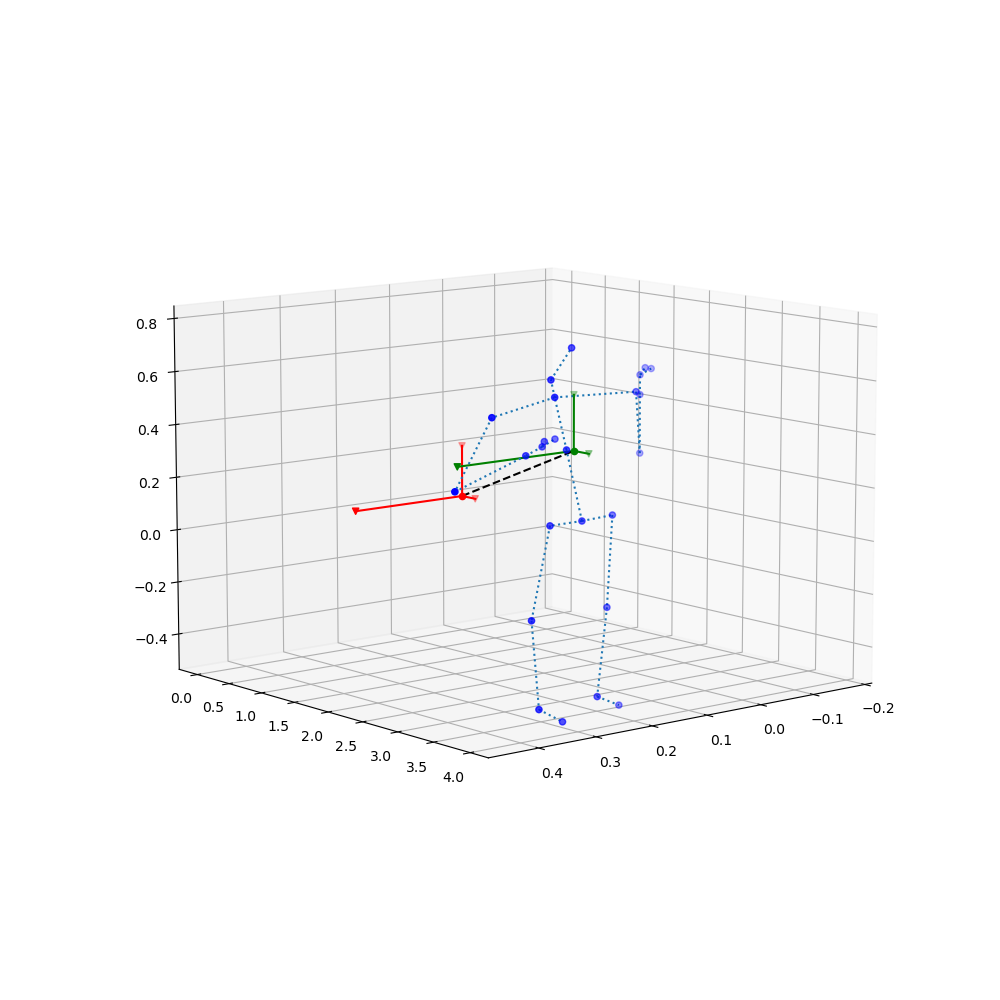

In [8]:
animateJointCoordinates(skeleton.transpose(3, 2, 0, 1)[0], connexion_tuples)